In [28]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [3]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [16]:
before = len(penguins["body_mass_g"])
after = len(penguins["body_mass_g"].fillna(penguins.mean()))

b = penguins_train[features].fillna(penguins_train.mean())
a = penguins_train['body_mass_g'].fillna(penguins_train.mean())

print(len(b))
print(len(b))

240
240


### Test/train split

In [9]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


# Regression

In [41]:
features= ['bill_length_mm','flipper_length_mm','bill_depth_mm']
dt_regression = DecisionTreeRegressor(max_depth = 3)
dt_regression.fit(penguins_train[features].dropna(), penguins_train['body_mass_g'].dropna())

DecisionTreeRegressor(max_depth=3)

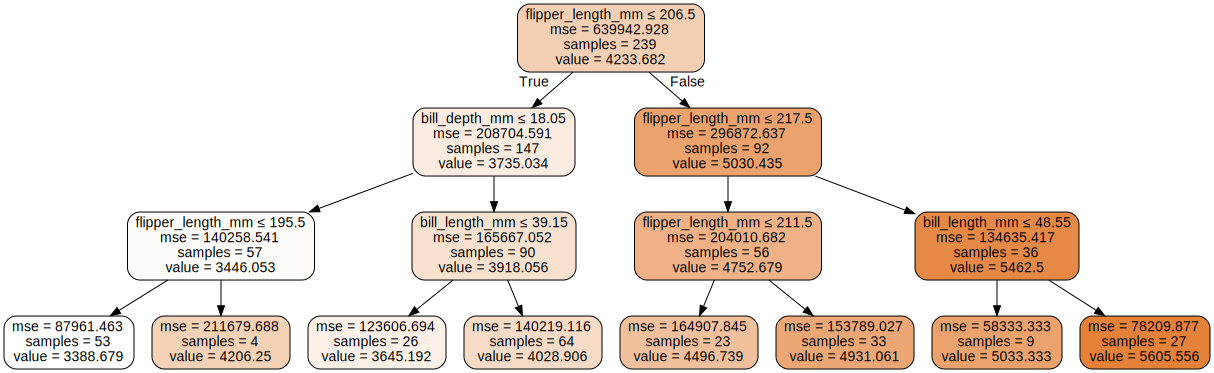

In [42]:
plot_tree_regression(dt_regression, features)

## Evaluating the model

In [43]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features].dropna())
predictionsOnTestset = dt_regression.predict(penguins_test[features].dropna())

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g.dropna())
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g.dropna())

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 349.5427901530589
RMSE on test set 362.17405566721516


de resultaten van de test en de train komen redelijk met elkaar overheen en scheelt niet veel. daarom is de dataset redelijk representatief om in deze setting de bodymass g te voorspellen het zit er maar tussen de 350 en 365 g naast wat opzich in mijn mening oke is.